<a href="https://colab.research.google.com/github/Apofice2/TP1_MLP_MNIST_version_eleve.ipynb/blob/main/TP1_MLP_MNIST_version_eleve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 : Classification d'images via MLP

L'objectif de ce TP est de se familiariser avec les fonctionnalités élémentaires de Tensor Flow via l'API Keras. Il s'agit d'une initiation dans le cadre d'un problème très classique : la classification d'images tirées du jeu de données MNIST. Les principaux "blocs" intervenant dans la résolution du problème sont présentés.

## 1. Chargement des données

Le jeu de données MNIST fait partie des dataset que l'on peut appeler directement à partir de keras.

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
(60000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

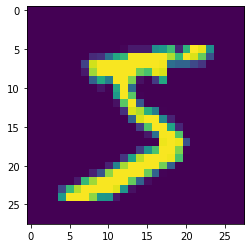

In [ ]:
%load_ext tensorboard

import matplotlib.pyplot as plt

import tensorflow as tf
import datetime

## Step 1
## Chargement des données (dataset MNIST)
## directement via keras


data = tf.keras.datasets.mnist

## Constitution des sous-jeux

(x_train,y_train), (x_test,y_test)=data.load_data()
plt.imshow(x_train[0])
print(x_train.shape)
x_train[1]


**Question 1** :

a) Combien d'images contiennent les jeux d'entrainement et de test ?

b) Renormaliser ces deux jeux de données de sorte que les niveaux de gris de chaque pixel soient compris entre 0 et 1

c) Représenter un échantillon d'images tirées du jeu de données d'entrainement.



(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

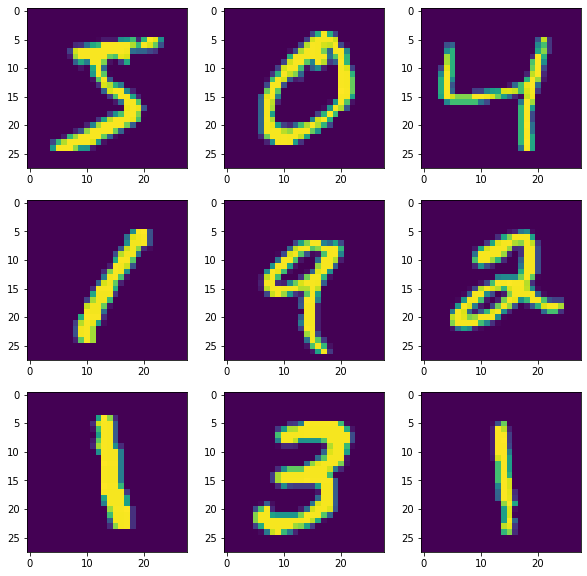

In [ ]:
## Information sur les données

print(x_train.shape)



## Renormalisation "à la main"
#print(len(x_train))
#(x_newtrain) , (x_newtest) = (1/255.0*x_train[i for i in range(50000)]) , (1/255.0*x_test[i for i in range(10000)])

#x_newtrain[2]
x_train2=x_train*1/255.0
x_test2=x_test*1/255.0

print(x_train2[10])

print("Echantillon d'images d'entrainement")

plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train2[i])
plt.show()

## 2. Création du modèle de calcul

Lorsqu'on a chargé les données, la prochaine étape est la construction d'un modèle de calcul (réseau de neurones). C'est une étape plus ou moins simple selon : la complexité du réseau sous-jacent et le niveau de paramétrisation désiré. Dans le cadre de cette introduction, on travaille avec une architecture simple et l'on considère l'implémentation la plus simple et directe possible.

**Question 2:**

a) A l'aide de $\texttt{Sequential}$, construire un modèle possédant les caractéristiques suivantes:

  -Une couche $\texttt{Flatten}$ qui convertit les données en tableau 1D

  -Une couche cachée $\texttt{Dense}$ à 64 neurones dont les fonctions d'activation sont sigmoidales

  -Une couche de sortie $\texttt{Dense}$ à 10 neurones dont la fonction d'activation globale est une fonction softmax

  -les poides des connexions associées aux deux couches denses sont initialisées via des lois normales selon la méthode proposée par He et Gloriot.

b) Pourquoi utiliser une fonction softmax pour la dernière couche ?

c) Combien de paramètres "entrainables" comporte le modèle ?



In [ ]:


## Step 2
## Création d'un modèle de calcul (architecture)

initializer = tf.initializers.HeNormal()

model=tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(64,activation="sigmoid",kernel_initializer=initializer ),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(10,activation="softmax", ),
])

model.build()
## Outils de visualisation / affichage

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## 3. Calibration et compilation

Lors de cette phase, on doit préciser les modalités de l'entrainement du modèle : fonction de perte, poids entrainables, algorithmes d'optimisation à utiliser, ...

A ce stade, on ne lance pas encore l'entrainement réel. On en décrit simplement les paramètres en vue des calculs menés lors de la prochaine étape.

**Question 3:**

a) A l'aide la méthode $\texttt{compile}$, préparer la calibration pour la configuration suivante:

-fonction de perte: entropie croisée

-algorithme d'optimisation: gradient stochastique avec taux d'apprentissage $\eta=0.001$.

b) Outre SGD, quels algorithmes d'optimisation sont disponibles ?

c) Justifier le choix de la fonction de perte
$\texttt{SparseCategoricalCrossentropy}$



In [ ]:

## Step 3
## Configuration et compilation du modèle
## Fonction de coût

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
## Algorithme d'optimisation
optim_algo_1 =tf.keras.optimizers.SGD(learning_rate=1e-3,momentum=0.0,nesterov=False)
optim_algo_2 =tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer= ,loss= ,metrics=['accuracy'])


## 4. Entrainement et visualisation

La méthode $\texttt{fit}$ ci-dessous permet de lancer l'entrainement.

**Question 4:**

a) A quoi correspond le nombre d'époques dans l'appel à la fonction ?

b) Quel est la signification du paramètre validation_split ?

In [ ]:
## Step 4
## Entrainement et analyse des résultats

## Paramétrage des "callback" vers Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## Paramétrage de l'entrainement
HISTORY=model.fit(x_train,y_train,epochs=20,validation_split=0.3,callbacks=[tensorboard_callback])


%tensorboard --logdir logs/fit



**Question 5:**

Mesurer la précision du modèle sur le jeu de données test constitué précédemment.

In [ ]:
eval_test = ....
print("[test loss, test accuracy]:", eval_test)